In [26]:
import pandas as pd

In [27]:
df=pd.read_csv('D:/Desktop/house.csv')

In [28]:
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAT','TAX','PTRATIO','B','LSTAT','MEDV']

In [29]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAT,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [44]:
X=df.iloc[:,:-1].values
y=df['MEDV'].values

In [45]:
from sklearn.model_selection import train_test_split as tts

In [46]:
Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=0.4,random_state=1)

In [47]:
from sklearn.ensemble import RandomForestRegressor as RF

In [48]:

forest=RF(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)

In [49]:
forest.fit(Xtrain,ytrain)
ytrainpred=forest.predict(Xtrain)
ytestpred=forest.predict(Xtest)

In [50]:
from sklearn.metrics import mean_squared_error as mser

In [51]:
ttrain=mser(ytrain,ytrainpred)
ttest=mser(ytest,ytestpred)

In [52]:
print('MSetrain:%.3f,Msetest:%.3f'%(ttrain,ttest))

MSetrain:1.393,Msetest:12.743


In [53]:
import matplotlib.pyplot as plt

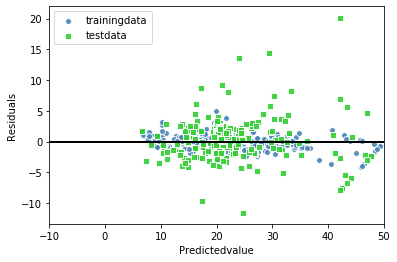

In [57]:
plt.scatter(ytrainpred,ytrainpred-ytrain,c='steelblue',edgecolor='white',marker='o',s=35,alpha=0.9,label='trainingdata')
plt.scatter(ytestpred,ytestpred-ytest,c='limegreen',edgecolor='white',marker='s',s=45,alpha=0.9,label='testdata')
plt.xlabel('Predictedvalue')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([-10,50])
plt.show()